In [86]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [87]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [112]:
filename = 'TECAN_210813.csv';
medium_dict = {
    "LB": 'A',
    "LB Mg": 'B',
    "LB maltose": 'C',
    "LBMM": 'D'
}

sample_dict = {
    "blank": [1,2],
    "LE392": [3,4],
    "LE392 p(pRM-GFP)": [5,6]
}

color_sample = {
    "blank": 'black',
    "LE392": 'tab:purple',
    "LE392 p(pRM-GFP)": 'tab:green'
}

color_medium = {
    "LB": 'black',
    "LB Mg": 'tab:purple',
    "LB maltose": 'tab:green',
    "LBMM": 'tab:red'
}

In [104]:
class Sample:
    def __init__(self, name, sample_idx, growth_medium, blank_idx, starting_point, fitting_point):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_medium = growth_medium
        self.blank_idx = blank_idx
        self.starting_point = starting_point
        self.fitting_point = fitting_point


In [105]:
sample_d = {};
for medium in medium_dict.keys():
    medium_d = {};
    row_id = medium_dict[medium];
    medium_idx = [];
    for j in range(0,len(sample_dict["blank"])):
        col_id = str(sample_dict["blank"][j]); 
        medium_idx.append(row_id+col_id)
    for sample in ['LE392', 'LE392 p(pRM-GFP)']:
        sample_idx = []; 
        for j in range(0,len(sample_dict[sample])):
            col_id = str(sample_dict[sample][j]); 
            sample_idx.append(row_id+col_id)
        medium_d[sample] = Sample(sample, sample_idx, medium, medium_idx,0,0);
    sample_d[medium] = medium_d;

In [106]:
sample_d['LB']['LE392'].sample_idx

['A3', 'A4']

In [107]:
df=pd.read_csv(filename,delimiter=',',index_col=0)  

In [108]:
time = df.loc['Time [s]']/60; 

Text(0, 0.5, 'Temperature (C)')

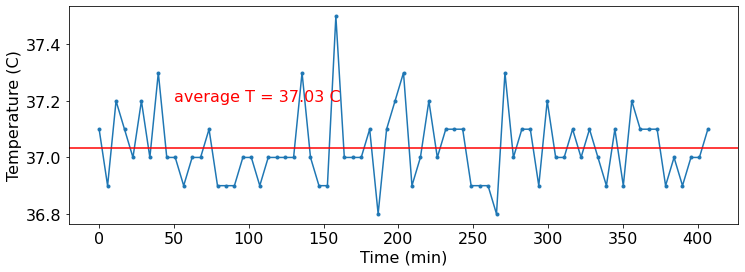

In [109]:
temp = df.loc['Temp. [C]']

def f_constant(x,c):
    return c
xdata = time;
ydata = temp;
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(50, 37.2, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

## check all samples

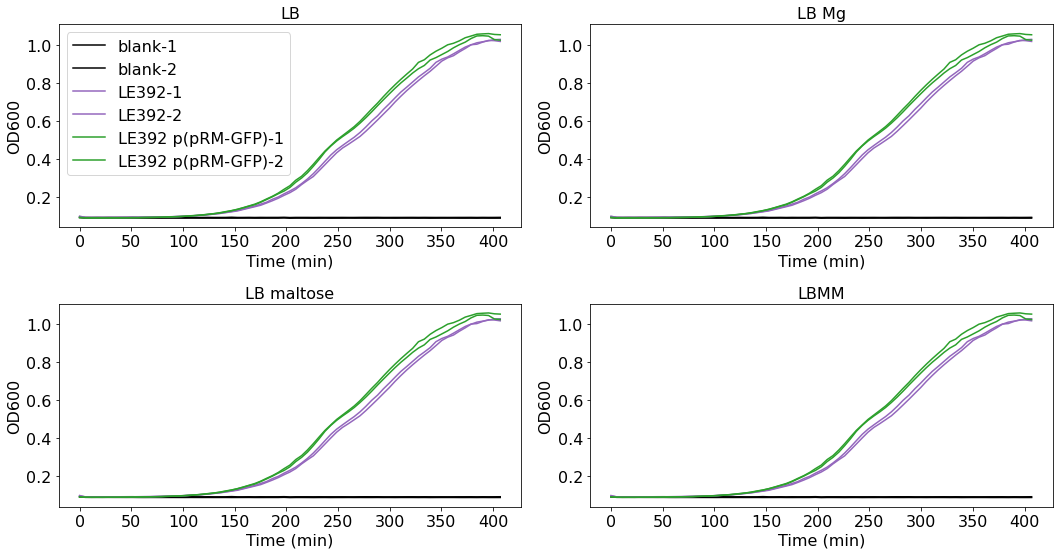

In [121]:
k = 0;
plt.rcParams["figure.figsize"] = (15,8)
for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
    subplot(2,2,k+1)
    for sample in ['blank', 'LE392', 'LE392 p(pRM-GFP)']:
        color = color_sample[sample]; 
        for j in range(0,len(sample_dict[sample])):
            col_idx = str(sample_dict[sample][j]);
            df_idx = row_idx+col_idx; 
            data = df.loc[df_idx]; 
            if k == 0:
                plt.plot(time, data, color=color, label=sample+'-'+str(j+1))
            else:
                plt.plot(time, data, color=color) 
    if k == 0:
        plt.legend()
    plt.xlabel('Time (min)')
    plt.ylabel('OD600')
    plt.title(medium)
    
    k = k+1;
plt.tight_layout()    
    

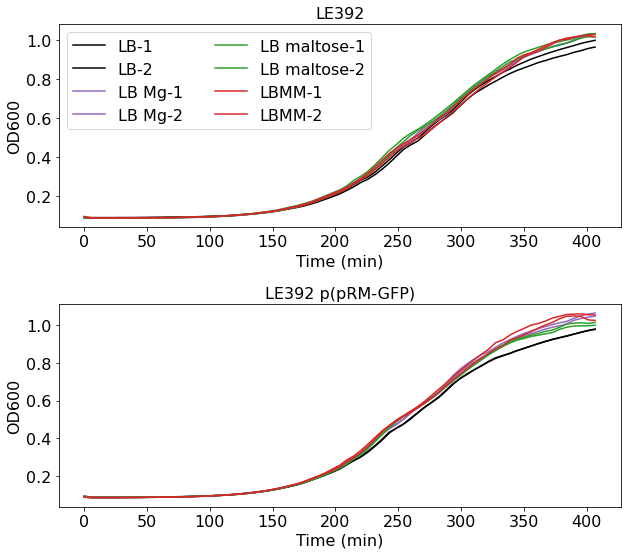

In [117]:
k = 0;
plt.rcParams["figure.figsize"] = (9,8)
for sample in ['LE392', 'LE392 p(pRM-GFP)']:
    subplot(2,1,k+1)
    for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
        color = color_medium[medium]; 
        j = 0;
        for df_idx in sample_d[medium][sample].sample_idx:
            data = df.loc[df_idx]; 
            if k == 0:
                plt.plot(time, data, color=color, label=medium+'-'+str(j+1))
            else:
                plt.plot(time, data, color=color)
            j = j+1;
    if k == 0:
        plt.legend(ncol=2)
    plt.xlabel('Time (min)')
    plt.ylabel('OD600')
    plt.title(sample)
    
    k = k+1;
plt.tight_layout() 

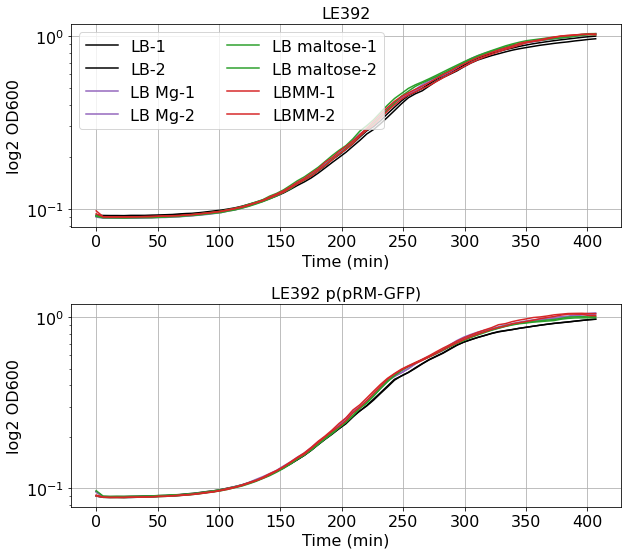

In [124]:
k = 0;
plt.rcParams["figure.figsize"] = (9,8)
for sample in ['LE392', 'LE392 p(pRM-GFP)']:
    subplot(2,1,k+1)
    for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
        color = color_medium[medium]; 
        j = 0;
        for df_idx in sample_d[medium][sample].sample_idx:
            data = df.loc[df_idx]; 
            if k == 0:
                plt.plot(time, data, color=color, label=medium+'-'+str(j+1))
            else:
                plt.plot(time, data, color=color)
            j = j+1;
    if k == 0:
        plt.legend(ncol=2)
    plt.xlabel('Time (min)')
    plt.ylabel('log2 OD600')
    plt.title(sample)
    plt.yscale('log')
    plt.grid('on')
    
    k = k+1;
plt.tight_layout() 

## find linear range for fitting

In [143]:
k = 0;
log_data = {};
plt.rcParams["figure.figsize"] = (12,8)
for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
    row_idx = medium_dict[medium]; 
    blank_idx = [];
    for j in range(0,len(sample_dict['blank'])):
        col_idx = str(sample_dict['blank'][j]);
        blank_idx.append(row_idx+col_idx)
    blank_data = df.loc[blank_idx].to_numpy(); 
    for sample in ['LE392', 'LE392 p(pRM-GFP)']:
        for j in range(0,len(sample_dict[sample])):
            col_idx = str(sample_dict[sample][j]);
            df_idx = row_idx+col_idx; 
            data = df.loc[df_idx].to_numpy() - np.mean(blank_data, axis=0);
            data = np.log2(data);
            log_data[df_idx] = data


<ipython-input-143-bd71b348c410>:16: RuntimeWarning: invalid value encountered in log2
  data = np.log2(data);


In [155]:
#pd.DataFrame.from_dict(log_data,orient='index')

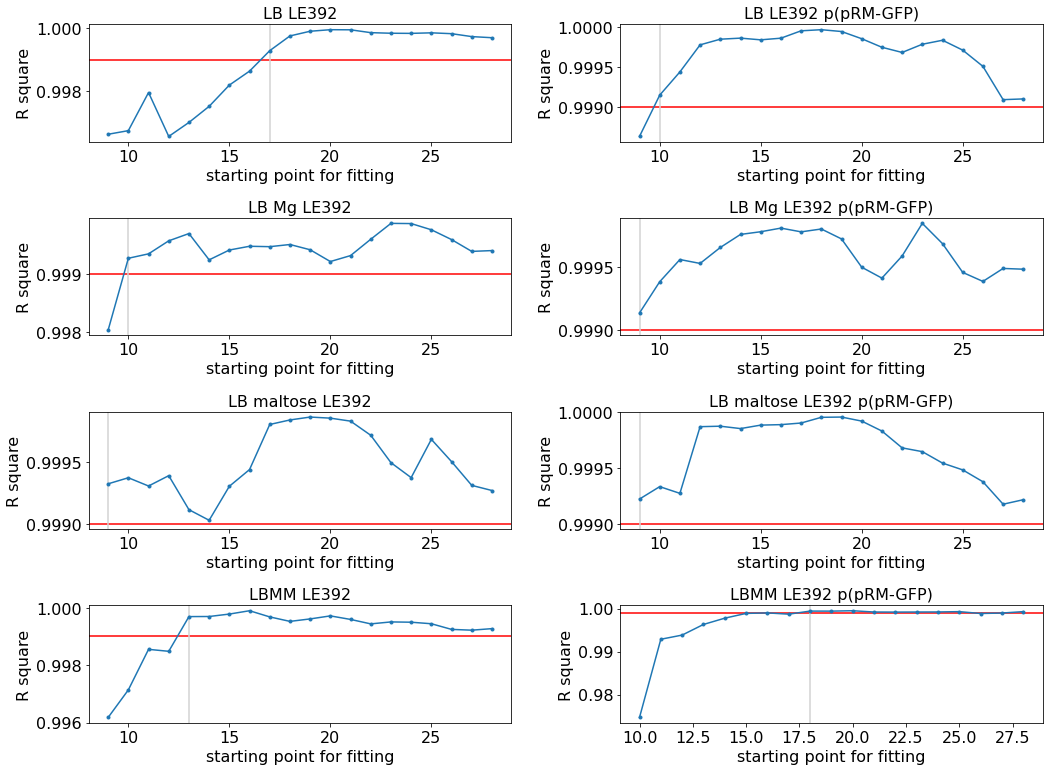

In [153]:
max_idx = 0;
for i in log_data.keys():
    tmp = np.where(np.isnan(log_data[i])==True)[0]
    if len(tmp) > 0:
        if tmp[-1] > max_idx:
            max_idx = tmp[-1];

            
log_df = pd.DataFrame.from_dict(log_data,orient='index')            
            
R_square_thresh = 0.999; 
starting_idx = np.arange(max_idx,max_idx+20,1);
starting_idx_selected = np.array([]); 

#################################################
plt.rcParams["figure.figsize"] = (15,11)
k = 0; 
for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
    row_idx = medium_dict[medium]; 
    for sample in ['LE392', 'LE392 p(pRM-GFP)']:
        R_square = np.array([]);
        title = medium+' '+sample; 
        sample_idx = sample_d[medium][sample].sample_idx; 
        for start_point in starting_idx:
            xdata = time[start_point:start_point+10].to_numpy();
            ydata = np.mean(log_df.loc[sample_idx,start_point:start_point+9].to_numpy(), axis=0); 
            slope, intercept, r_value, _, _ = linregress(xdata, ydata);
            R_square = np.append(R_square, r_value);
        my_start = starting_idx[np.where(R_square>R_square_thresh)[0][0]]; 
        sample_d[medium][sample].starting_point = my_start; 
        subplot(4,2,k+1)
        plt.axhline(R_square_thresh,color='r')
        plt.axvline(my_start,color='lightgrey')
        plt.plot(starting_idx, R_square, '.-');
        plt.title(title)
        plt.ylabel('R square')
        plt.xlabel('starting point for fitting')
        k = k+1

plt.tight_layout()

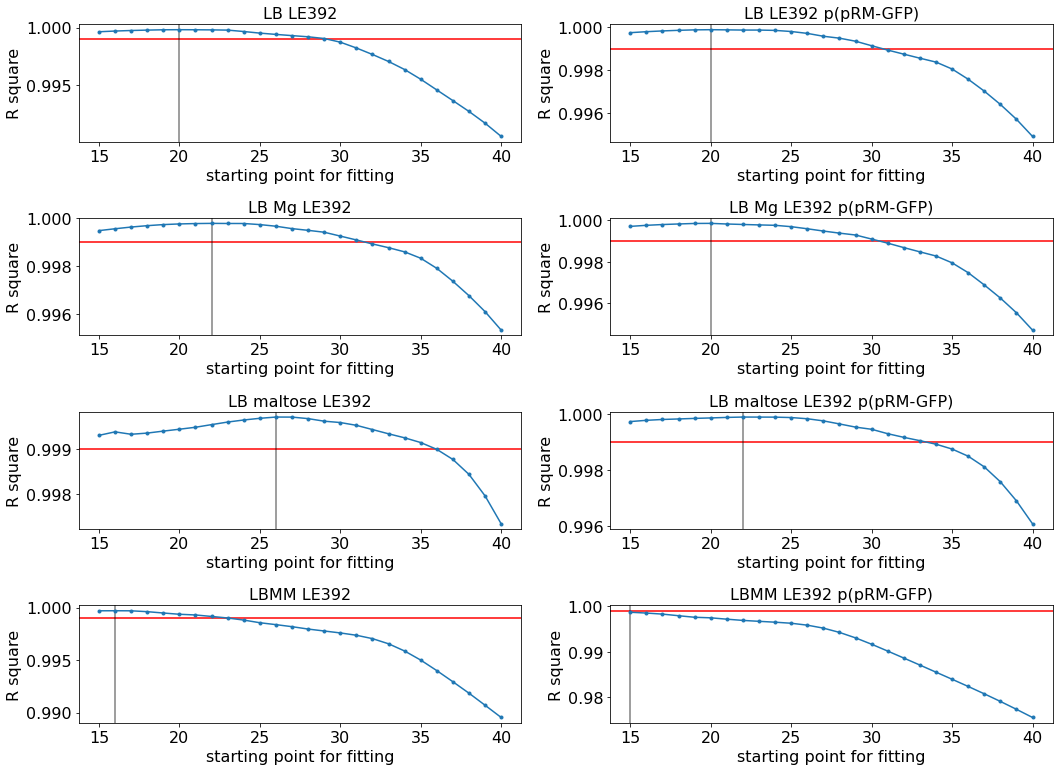

In [177]:
fitting_points = np.arange(15,41,1);

plt.rcParams["figure.figsize"] = (15,11)
k = 0; 
for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
    for sample in ['LE392', 'LE392 p(pRM-GFP)']:
        R_square = np.array([]);
        title = medium+' '+sample; 
        sample_idx = sample_d[medium][sample].sample_idx;
        ydata_all = log_df.loc[sample_idx,:].to_numpy(); 
        j_0 = sample_d[medium][sample].starting_point; 
        for j in fitting_points:
            xdata = time[j_0:j_0+j].to_numpy();
            ydata = np.mean(ydata_all[:,j_0:j_0+j], axis=0); 
            slope, intercept, r_value, _, _ = linregress(xdata, ydata);
            R_square = np.append(R_square, r_value);
        sample_d[medium][sample].fitting_point = fitting_points[np.argmax(R_square)];
        subplot(4,2,k+1)
        plt.axhline(R_square_thresh,color='r')
        plt.axvline(fitting_points[np.argmax(R_square)],color='k',alpha = 0.5)
        plt.plot(fitting_points, R_square, '.-');
        plt.title(title)
        plt.ylabel('R square')
        plt.xlabel('starting point for fitting')
        k = k+1
plt.tight_layout()

## fitting

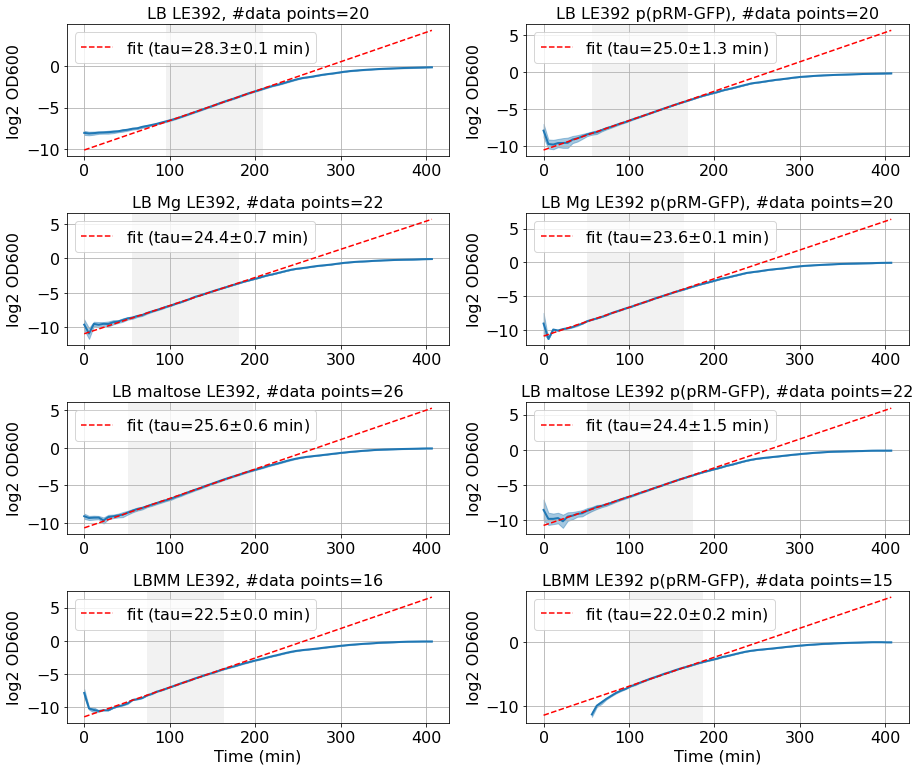

In [179]:
plt.rcParams["figure.figsize"] = (13,11)
k = 0; 
for medium in ['LB','LB Mg', 'LB maltose', 'LBMM']:
    for sample in ['LE392', 'LE392 p(pRM-GFP)']:
        title = medium+' '+sample; 
        sample_idx = sample_d[medium][sample].sample_idx;
        
        time_c = time.to_numpy();
        i =  log_df.loc[sample_idx,:].to_numpy(); 
        
        j_0 = sample_d[medium][sample].starting_point; 
        j = sample_d[medium][sample].fitting_point; 
        slope_array = np.array([]);
        inter_array = np.array([]); 
        generation_time_tmp = np.array([]);
        
        
        for idx_k in range(0,len(i[:,1])):
            xdata = time[j_0:j_0+j].to_numpy();
            ydata = i[idx_k,j_0:j_0+j]; 
            slope, intercept, r_value, _, _ = linregress(xdata, ydata);
            generation_time_tmp = np.append(generation_time_tmp, 1/slope); 
            slope_array = np.append(slope_array, slope);
            inter_array = np.append(inter_array, intercept);
        generation_time = str(np.mean(generation_time_tmp))[:4];
        generation_time_err = str(np.std(generation_time_tmp))[:3];
        y = np.mean(i,axis=0); 
        yerr = np.std(i,axis=0);
        
        subplot(4,2,k+1)
        plt.fill_between(time_c, y-yerr, y+yerr, alpha=0.4,color='tab:blue');
        plt.plot(time_c, y,linewidth=2, color='tab:blue');
        plt.plot(time_c, np.mean(slope_array)*time_c+np.mean(inter_array), \
                 'r--',label='fit (tau='+generation_time+'$\pm$'+generation_time_err+' min)')
        plt.axvspan(time_c[j_0], time_c[j_0+j], facecolor='black', alpha=0.05)
        plt.title(title+', #data points='+str(j)); 
        plt.legend()
        plt.grid(True);plt.ylabel('log2 OD600')
        k = k+1; 
        
        if k == 7 or k ==8:
            plt.xlabel('Time (min)')
plt.tight_layout()